In [24]:
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
sys.path.append("..")
from solvers.aco.aco_solver import AntColonyOptSolver
from problem.sudoku_manager import Sudoku
from time import perf_counter
from statistics import mean

In [25]:
params = {
    "seed": 188,
    "test_id": 21,
    "start_id": 72,
    "num_of_runs": 3,
    "num_of_sudokus": 3,
    "sudoku_level": "hard",
    "max_epoch": 500,
    "greed_factor": 0.82,
    "local_pher_factor": 0.14,
    "global_pher_factor": 0.7,
    "evaporation": 0.005,
    "ants_count": 81
}

In [26]:
sudokus_range = range(params["start_id"], params["start_id"] + params["num_of_sudokus"])

sudokus = [Sudoku(params["sudoku_level"], id) for id in sudokus_range]


In [27]:
solver = AntColonyOptSolver(
    max_epoch=params['max_epoch'],
    greed_factor=params['greed_factor'],
    local_pher_factor=params['local_pher_factor'],
    global_pher_factor=params['global_pher_factor'],
    evaporation=params['evaporation'],
    seed=params['seed']
)

In [28]:
def test_aco_solver(solver, sudokus):
    solutions_list = []
    best_scores_list = []
    best_per_iters = []
    ants_moves_list = []
    exec_times = []
    for i in range(params['num_of_sudokus']):
        print(f"Sudoku to solve:\n{sudokus[i].board}\n")
        for j in range(params['num_of_runs']):
            start_time = perf_counter()
            results = solver.solve(sudoku=sudokus[i], ants_count=params['ants_count'])
            exec_times.append(perf_counter() - start_time)
            solutions_list.append(results[0])
            best_scores_list.append(results[1])
            best_per_iters.append(results[2])
            ants_moves_list.append(results[3])
    return solutions_list, best_scores_list, best_per_iters, ants_moves_list, exec_times

In [29]:
solutions, best_scores, best_per_iters, ants_moves_list, exec_times = test_aco_solver(solver, sudokus)

Sudoku to solve:
[[0 6 5 4 0 0 0 0 0]
 [0 0 0 0 9 0 8 0 7]
 [0 9 0 0 0 7 0 0 0]
 [0 0 4 0 0 9 3 0 0]
 [0 0 0 0 0 3 4 5 0]
 [3 0 7 2 0 0 0 8 0]
 [2 0 8 6 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0]
 [0 0 9 0 0 0 5 0 1]]

EPOCH 1: most fixed = 81, failed count: 0
Problem solved. Solution:
[[7 6 5 4 2 8 9 1 3]
 [4 1 2 3 9 5 8 6 7]
 [8 9 3 1 6 7 2 4 5]
 [1 2 4 5 8 9 3 7 6]
 [9 8 6 7 1 3 4 5 2]
 [3 5 7 2 4 6 1 8 9]
 [2 3 8 6 5 1 7 9 4]
 [5 4 1 9 7 2 6 3 8]
 [6 7 9 8 3 4 5 2 1]]

EPOCH 1: most fixed = 77, failed count: 2
EPOCH 2: most fixed = 77, failed count: 2
EPOCH 3: most fixed = 77, failed count: 2
EPOCH 4: most fixed = 77, failed count: 2
EPOCH 5: most fixed = 77, failed count: 2
EPOCH 6: most fixed = 81, failed count: 0
Problem solved. Solution:
[[7 6 5 4 2 8 9 1 3]
 [4 1 2 3 9 5 8 6 7]
 [8 9 3 1 6 7 2 4 5]
 [1 2 4 5 8 9 3 7 6]
 [9 8 6 7 1 3 4 5 2]
 [3 5 7 2 4 6 1 8 9]
 [2 3 8 6 5 1 7 9 4]
 [5 4 1 9 7 2 6 3 8]
 [6 7 9 8 3 4 5 2 1]]

EPOCH 1: most fixed = 81, failed count: 0
Problem solved. Soluti

In [30]:
MAX_STEPS = max([len(bests) for bests in best_per_iters])
avg_steps = mean([len(bests) for bests in best_per_iters])

In [31]:
def normalize_arr(arr):
    if arr.shape[0] == MAX_STEPS:
      return arr
    else:
      norm_arr = np.zeros((MAX_STEPS,))
      norm_arr[:len(arr)] = arr
      norm_arr[len(arr):] = max(arr)
      return norm_arr

In [32]:
def normalize_best_per_iters(best_per_iters):
    best_iters_avg = []
    best_iters_max = []
    best_iters_min = []
    normalized_best_iters = np.array([normalize_arr(bests) for bests in best_per_iters])
    for i in range(normalized_best_iters.shape[1]):
        best_iters_avg.append(mean(normalized_best_iters[:, i]))
        best_iters_max.append(max(normalized_best_iters[:, i]))
        best_iters_min.append(min(normalized_best_iters[:, i]))
    return best_iters_avg, best_iters_max, best_iters_min

In [33]:
best_per_iters_avg, best_per_iters_max, best_per_iters_min = normalize_best_per_iters(best_per_iters)

In [34]:
avg_best_score = mean(best_scores)
avg_best_score

81

In [35]:
avg_ants_moves = mean(ants_moves_list)
avg_ants_moves

103545

In [36]:
avg_exec_time = mean(exec_times)
avg_exec_time

21.62382825188892

In [37]:
params_text = "max_epoch={}, greed_factor={}, local_pher_f={}, global_pher_f={}, evaporation={}, ants_count={}".format(
                params["max_epoch"],
                params["greed_factor"],
                params["local_pher_factor"],
                params["global_pher_factor"],
                params["evaporation"],
                params["ants_count"]
            )

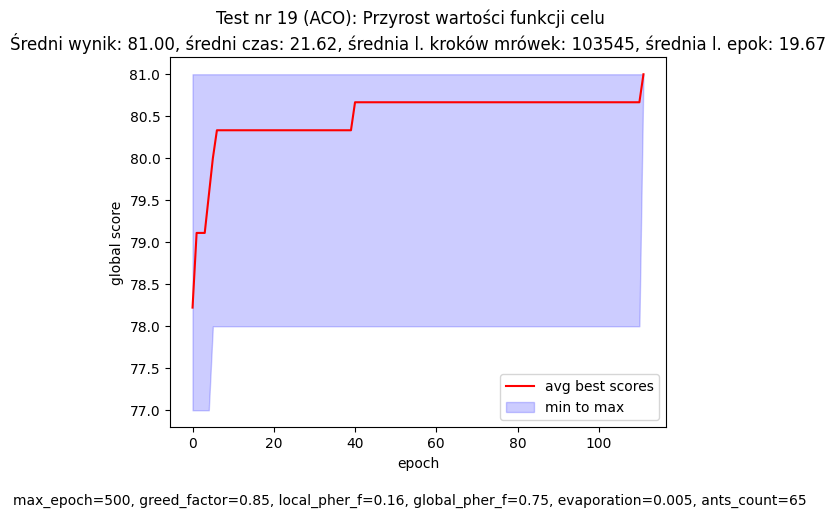

In [38]:
plt.figure()
plt.fill_between(range(MAX_STEPS), best_per_iters_min, best_per_iters_max, color='b', alpha=0.2, label='min to max')
plt.plot(range(MAX_STEPS), (best_per_iters_avg), 'r', label='avg best scores')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('global score')
plt.suptitle('Test nr {} (ACO): Przyrost wartości funkcji celu'.format(params['test_id']))
plt.title('Średni wynik: {:.2f}, średni czas: {:.2f}, średnia l. kroków mrówek: {}, średnia l. epok: {:.2f}'.format(avg_best_score, avg_exec_time, avg_ants_moves, avg_steps))
plt.figtext(0.5, -0.05, params_text, wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig("../../results/plots/aco/test_aco_nr_{}.png".format(params['test_id']), bbox_inches="tight")
plt.show()

In [39]:
with open("../../results/params/aco/test_aco_nr_{}.json".format(params['test_id']), "w") as write_file:
    json.dump(params, write_file, indent=4)